In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureEmodb_Ek_new.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
0,-290.069550,120.892410,-44.022133,59.493820,-25.234184,24.166288,-20.102554,-3.104467,-3.912210,-8.433292,...,56.398769,0.009679,0.012519,-0.031646,0.024728,0.007912,0.001966,0,6,3
1,-274.512543,137.867325,-33.016861,49.305836,-7.529972,15.471715,-6.811347,-7.069037,-8.804790,-1.528063,...,53.806400,-0.001984,0.006133,-0.084608,0.109369,-0.025859,-0.003522,0,3,3
2,-225.866470,94.075874,-72.961555,41.311485,-27.577299,12.030844,-14.943604,-8.053857,-11.431667,-10.043902,...,54.852081,0.001015,-0.006297,-0.033966,-0.076824,0.011315,-0.001692,0,1,3
3,-273.849060,98.794968,-36.564865,36.316208,-22.404598,18.368185,-12.455775,-1.077722,-12.487121,-17.107168,...,58.313221,0.039030,-0.017753,-0.081100,-0.049775,0.015536,-0.007109,0,6,3
4,-252.887863,149.398911,-24.717367,45.297226,-0.930259,5.930630,0.473345,-0.681704,-12.864426,-9.714954,...,51.336941,0.008184,-0.018455,-0.020061,-0.058433,0.009487,0.034003,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [3]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [4]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

17/17 [==============================] - 0s 1ms/step


In [5]:
print(gender_predictions)

[[5.3914841e-02]
 [2.7344990e-04]
 [2.8685003e-03]
 [5.4774457e-03]
 [3.7811184e-04]
 [1.0176876e-03]
 [4.2065262e-04]
 [5.4871949e-04]
 [6.4877611e-01]
 [3.4983151e-03]
 [1.2081929e-03]
 [6.5318710e-04]
 [1.7036605e-03]
 [3.1155697e-03]
 [2.2163147e-02]
 [9.7968860e-04]
 [8.3286525e-04]
 [1.1550989e-03]
 [1.0704088e-03]
 [9.9626166e-01]
 [4.2972350e-04]
 [4.3027862e-03]
 [2.1547864e-01]
 [2.5862953e-04]
 [2.3637460e-04]
 [1.8480223e-03]
 [1.0041273e-03]
 [6.6287938e-04]
 [1.1812864e-03]
 [3.2756152e-04]
 [4.8196479e-04]
 [1.1076912e-02]
 [1.6184397e-03]
 [7.2550477e-04]
 [1.2340237e-02]
 [2.8029407e-04]
 [6.6080788e-04]
 [8.5476867e-04]
 [3.7037355e-03]
 [1.6264275e-03]
 [4.0304218e-04]
 [1.4188240e-03]
 [5.0482724e-04]
 [1.3442766e-02]
 [9.8911917e-04]
 [2.2824713e-04]
 [1.3678925e-03]
 [9.5574238e-04]
 [3.3694410e-03]
 [9.9811941e-01]
 [9.9871039e-01]
 [9.9928093e-01]
 [9.9837577e-01]
 [9.9949455e-01]
 [9.9489617e-01]
 [9.9989474e-01]
 [9.9954426e-01]
 [9.9913985e-01]
 [9.9765438e-0

In [6]:
male_rows = gender_predictions.flatten() >= 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 305 male samples.


In [7]:
df.shape

(305, 196)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,gender,emo,speaker
8,-232.638443,89.456322,-43.025047,56.121426,-30.281635,26.793831,-22.736311,2.398285,-7.792972,-18.290497,...,56.830521,0.043076,0.005311,0.013578,-0.024233,-0.005906,0.012298,0,5,3
19,-252.926743,97.129494,-62.079552,38.996372,-32.850922,11.289834,-21.996538,-11.891141,-13.001657,-19.354004,...,56.454013,-0.004030,-0.003963,-0.017737,0.007128,0.012398,-0.007039,0,1,3
49,-242.296738,100.131287,-49.905891,39.019207,-28.569174,28.434782,-22.502106,-8.388103,-1.577434,-16.187185,...,56.029853,0.016974,0.017489,0.021310,-0.077259,-0.011524,-0.013297,1,5,8
50,-185.100357,102.095390,-32.449959,48.499172,-18.903458,17.655661,-11.422845,3.079878,-1.342817,-5.473735,...,56.943466,-0.006739,0.013350,0.045375,0.115081,0.011807,0.032250,1,6,8
51,-296.696777,111.588104,-15.979291,30.510899,-11.087157,21.032894,-8.265782,-8.720767,-4.711420,-11.372763,...,55.685641,-0.081280,0.044741,0.183663,-0.005616,-0.015490,0.079741,1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264,1,2,16
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948,1,7,16
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342,1,7,16
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701,1,1,16


In [9]:
data.iloc[:,-3] == 1

0      False
1      False
2      False
3      False
4      False
       ...  
530     True
531     True
532     True
533     True
534     True
Name: gender, Length: 535, dtype: bool

In [10]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
8,-232.638443,89.456322,-43.025047,56.121426,-30.281635,26.793831,-22.736311,2.398285,-7.792972,-18.290497,...,15.066771,16.476014,15.559421,56.830521,0.043076,0.005311,0.013578,-0.024233,-0.005906,0.012298
19,-252.926743,97.129494,-62.079552,38.996372,-32.850922,11.289834,-21.996538,-11.891141,-13.001657,-19.354004,...,17.440280,18.670118,19.388358,56.454013,-0.004030,-0.003963,-0.017737,0.007128,0.012398,-0.007039
49,-242.296738,100.131287,-49.905891,39.019207,-28.569174,28.434782,-22.502106,-8.388103,-1.577434,-16.187185,...,15.609642,18.692301,17.012600,56.029853,0.016974,0.017489,0.021310,-0.077259,-0.011524,-0.013297
50,-185.100357,102.095390,-32.449959,48.499172,-18.903458,17.655661,-11.422845,3.079878,-1.342817,-5.473735,...,14.983087,16.689537,17.606614,56.943466,-0.006739,0.013350,0.045375,0.115081,0.011807,0.032250
51,-296.696777,111.588104,-15.979291,30.510899,-11.087157,21.032894,-8.265782,-8.720767,-4.711420,-11.372763,...,16.867387,18.443066,17.613748,55.685641,-0.081280,0.044741,0.183663,-0.005616,-0.015490,0.079741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-255.980286,105.676674,-42.180950,75.896423,-23.686800,10.384299,-17.101816,-5.522916,-3.057154,-10.192598,...,16.838569,17.835524,19.693569,56.598065,0.013773,-0.044897,0.036112,-0.103853,0.014030,0.004264
531,-246.298492,91.399818,-25.200518,57.381245,-6.517654,19.359470,-4.424452,-3.416811,2.381373,-6.032308,...,15.286078,17.031323,18.757498,56.940429,0.022640,0.051658,0.111283,0.034628,0.032623,-0.023948
532,-287.566315,88.560669,-21.810999,60.376926,-0.650359,19.902147,-0.450192,2.266046,3.220632,-6.157897,...,14.402789,15.672307,17.590725,56.867307,0.064417,0.045792,-0.014448,0.036817,-0.002728,-0.039342
533,-329.608124,67.631531,-87.368507,64.361099,-49.395180,-1.466112,-20.686680,-10.990952,-6.811410,-28.455215,...,19.920409,19.619588,21.609127,53.589258,0.004312,0.004346,-0.046711,-0.008183,-0.011669,0.014701


In [12]:
y

8      5
19     1
49     5
50     6
51     2
      ..
530    2
531    7
532    7
533    1
534    1
Name: emo, Length: 305, dtype: int64

In [13]:
X_speaker

8       3
19      3
49      8
50      8
51      8
       ..
530    16
531    16
532    16
533    16
534    16
Name: speaker, Length: 305, dtype: int64

In [14]:
X.shape, y.shape

((305, 193), (305,))

In [15]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
354,-309.687683,92.159103,-38.313023,52.110058,-23.497505,30.036774,-21.611717,-4.584645,-7.509318,-10.200588,...,15.226097,17.280133,16.569275,57.889888,-0.007681,-0.027543,0.068826,0.018333,-0.022740,-0.012447
327,-202.552460,133.436630,-24.282377,63.772812,-5.182028,13.748986,-29.226624,-11.421471,-9.034680,-10.025787,...,16.461161,17.451232,18.452397,56.755769,-0.004594,0.048534,0.140713,-0.002007,0.016093,-0.026556
284,-267.656097,79.630531,-55.695938,27.406511,-29.934868,10.334890,-17.297575,0.268291,-16.292261,-17.258669,...,16.307983,17.474602,16.618136,58.454917,0.021202,0.008438,-0.006530,-0.060584,0.019180,-0.012449
477,-239.226791,125.856255,-62.670448,46.222015,-15.491755,21.631771,-24.916252,-9.516450,-6.833887,-19.260288,...,15.711440,19.742971,18.123548,54.374759,0.030159,-0.016358,-0.044310,0.022784,-0.007712,0.014539
107,-288.776489,94.990456,-52.119747,26.218609,-9.600658,11.558594,-14.689038,-4.392528,1.394819,-4.962986,...,15.202061,18.044046,17.782680,55.201836,0.027072,-0.008164,0.054804,0.005363,-0.005913,-0.020421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-276.581482,91.643784,-50.315346,47.790154,-37.516369,7.750670,-18.004366,-10.279112,-5.893856,-19.520216,...,17.616242,17.942695,18.274429,55.062009,0.022938,0.024144,0.052083,-0.011187,-0.000132,0.000828
118,-324.350342,98.367813,-63.108521,38.622513,-15.670211,6.587821,-17.540968,-16.680405,-5.475886,-16.218554,...,16.463771,17.343807,19.832741,52.194932,0.033445,-0.004911,0.060802,0.017907,-0.017416,0.013493
279,-218.967316,111.856621,-35.617043,52.094688,-17.958475,26.547173,-25.088844,-8.275445,-13.587209,-3.342106,...,14.728909,16.908065,16.491292,55.640507,-0.000287,0.008229,-0.036778,0.035264,-0.003677,-0.005195
500,-196.153351,61.573624,-66.337166,71.401947,-39.169395,13.426764,-31.778332,-10.184829,-7.434160,-23.351307,...,17.292589,17.867397,18.674767,56.258996,-0.036457,0.000975,0.094340,0.042450,-0.012736,-0.011981


In [17]:
X_speaker

354    14
327    13
284    13
477    16
107     9
       ..
362    14
118     9
279    13
500    16
149     9
Name: speaker, Length: 305, dtype: int64

In [18]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [19]:
y1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
X.shape, y1.shape

((305, 193), (305, 7))

In [21]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [22]:
X2.shape, X2_speaker.shape, y2.shape

((305, 193), (305,), (305,))

In [23]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [24]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [25]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-309.687683,92.159103,-38.313023,52.110058,-23.497505,30.036774,-21.611717,-4.584645,-7.509318,-10.200588,...,15.226097,17.280133,16.569275,57.889888,-0.007681,-0.027543,0.068826,0.018333,-0.022740,-0.012447
1,-202.552460,133.436630,-24.282377,63.772812,-5.182028,13.748986,-29.226624,-11.421471,-9.034680,-10.025787,...,16.461161,17.451232,18.452397,56.755769,-0.004594,0.048534,0.140713,-0.002007,0.016093,-0.026556
2,-267.656097,79.630531,-55.695938,27.406511,-29.934868,10.334890,-17.297575,0.268291,-16.292261,-17.258669,...,16.307983,17.474602,16.618136,58.454917,0.021202,0.008438,-0.006530,-0.060584,0.019180,-0.012449
3,-239.226791,125.856255,-62.670448,46.222015,-15.491755,21.631771,-24.916252,-9.516450,-6.833887,-19.260288,...,15.711440,19.742971,18.123548,54.374759,0.030159,-0.016358,-0.044310,0.022784,-0.007712,0.014539
4,-288.776489,94.990456,-52.119747,26.218609,-9.600658,11.558594,-14.689038,-4.392528,1.394819,-4.962986,...,15.202061,18.044046,17.782680,55.201836,0.027072,-0.008164,0.054804,0.005363,-0.005913,-0.020421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,-276.581482,91.643784,-50.315346,47.790154,-37.516369,7.750670,-18.004366,-10.279112,-5.893856,-19.520216,...,17.616242,17.942695,18.274429,55.062009,0.022938,0.024144,0.052083,-0.011187,-0.000132,0.000828
301,-324.350342,98.367813,-63.108521,38.622513,-15.670211,6.587821,-17.540968,-16.680405,-5.475886,-16.218554,...,16.463771,17.343807,19.832741,52.194932,0.033445,-0.004911,0.060802,0.017907,-0.017416,0.013493
302,-218.967316,111.856621,-35.617043,52.094688,-17.958475,26.547173,-25.088844,-8.275445,-13.587209,-3.342106,...,14.728909,16.908065,16.491292,55.640507,-0.000287,0.008229,-0.036778,0.035264,-0.003677,-0.005195
303,-196.153351,61.573624,-66.337166,71.401947,-39.169395,13.426764,-31.778332,-10.184829,-7.434160,-23.351307,...,17.292589,17.867397,18.674767,56.258996,-0.036457,0.000975,0.094340,0.042450,-0.012736,-0.011981


In [26]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,14
1,13
2,13
3,16
4,9
...,...
300,14
301,9
302,13
303,16


In [27]:
speakers = X_speaker.unique()
speakers

array([14, 13, 16,  9,  8, 10,  3], dtype=int64)

In [28]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,14
1,13
2,13
3,16
4,9
...,...
300,14
301,9
302,13
303,16


In [29]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-309.687683,92.159103,-38.313023,52.110058,-23.497505,30.036774,-21.611717,-4.584645,-7.509318,-10.200588,...,17.280133,16.569275,57.889888,-0.007681,-0.027543,0.068826,0.018333,-0.022740,-0.012447,14
1,-202.552460,133.436630,-24.282377,63.772812,-5.182028,13.748986,-29.226624,-11.421471,-9.034680,-10.025787,...,17.451232,18.452397,56.755769,-0.004594,0.048534,0.140713,-0.002007,0.016093,-0.026556,13
2,-267.656097,79.630531,-55.695938,27.406511,-29.934868,10.334890,-17.297575,0.268291,-16.292261,-17.258669,...,17.474602,16.618136,58.454917,0.021202,0.008438,-0.006530,-0.060584,0.019180,-0.012449,13
3,-239.226791,125.856255,-62.670448,46.222015,-15.491755,21.631771,-24.916252,-9.516450,-6.833887,-19.260288,...,19.742971,18.123548,54.374759,0.030159,-0.016358,-0.044310,0.022784,-0.007712,0.014539,16
4,-288.776489,94.990456,-52.119747,26.218609,-9.600658,11.558594,-14.689038,-4.392528,1.394819,-4.962986,...,18.044046,17.782680,55.201836,0.027072,-0.008164,0.054804,0.005363,-0.005913,-0.020421,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,-276.581482,91.643784,-50.315346,47.790154,-37.516369,7.750670,-18.004366,-10.279112,-5.893856,-19.520216,...,17.942695,18.274429,55.062009,0.022938,0.024144,0.052083,-0.011187,-0.000132,0.000828,14
301,-324.350342,98.367813,-63.108521,38.622513,-15.670211,6.587821,-17.540968,-16.680405,-5.475886,-16.218554,...,17.343807,19.832741,52.194932,0.033445,-0.004911,0.060802,0.017907,-0.017416,0.013493,9
302,-218.967316,111.856621,-35.617043,52.094688,-17.958475,26.547173,-25.088844,-8.275445,-13.587209,-3.342106,...,16.908065,16.491292,55.640507,-0.000287,0.008229,-0.036778,0.035264,-0.003677,-0.005195,13
303,-196.153351,61.573624,-66.337166,71.401947,-39.169395,13.426764,-31.778332,-10.184829,-7.434160,-23.351307,...,17.867397,18.674767,56.258996,-0.036457,0.000975,0.094340,0.042450,-0.012736,-0.011981,16


In [30]:
# Get top 5 speakers with the most data

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = speaker_counts.head(5).index.to_numpy()

print("Selected speakers:", selected_speakers)

Selected speakers: [16 14 13  8  9]


In [31]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=305
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='Emodb_speaker_female'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 16
Train speakers: [ 3  8  9 10 13 14]
No overlap in fold 0.
Selected FS indices: [104   8   0  41   4   6   5  38  24  26  21  48  31  14 101  74 143 133
  80  44  61  28  32  20  30  17  25  33  12  57  27  69  36  68  84 116
 155 169 128 130  49  42  18  15  19  29  60  50  35  63  91  58  62  22
  10  23  13   7   9  43  82  90 119 138 146 173 164 170 151 117 134 153
 137 156 178 183 181 157 129 123 115 127 139 147 167 148 135 126  65  70
  66  85 124  98 145 121 174 141 132 110  40  77 100 105  75  83  78  96
  72  59  94  86  56  55  52  53  39  73  79 107 103  88  92 114 112]
0
Epoch 1/700
8/8 [==============================] - 3s 125ms/step - loss: 2.2811 - accuracy: 0.1538 - val_loss: 2.1080 - val_accuracy: 0.1549
Epoch 2/700
8/8 [==============================] - 1s 95ms/step - loss: 2.0201 - accuracy: 0.2350 - val_loss: 2.0240 - val_accuracy: 0.1690
Epoch 3/700
8/8 [==============================] - 1s 103ms/step - loss: 1.8761 - accuracy: 0.2778 - val_l

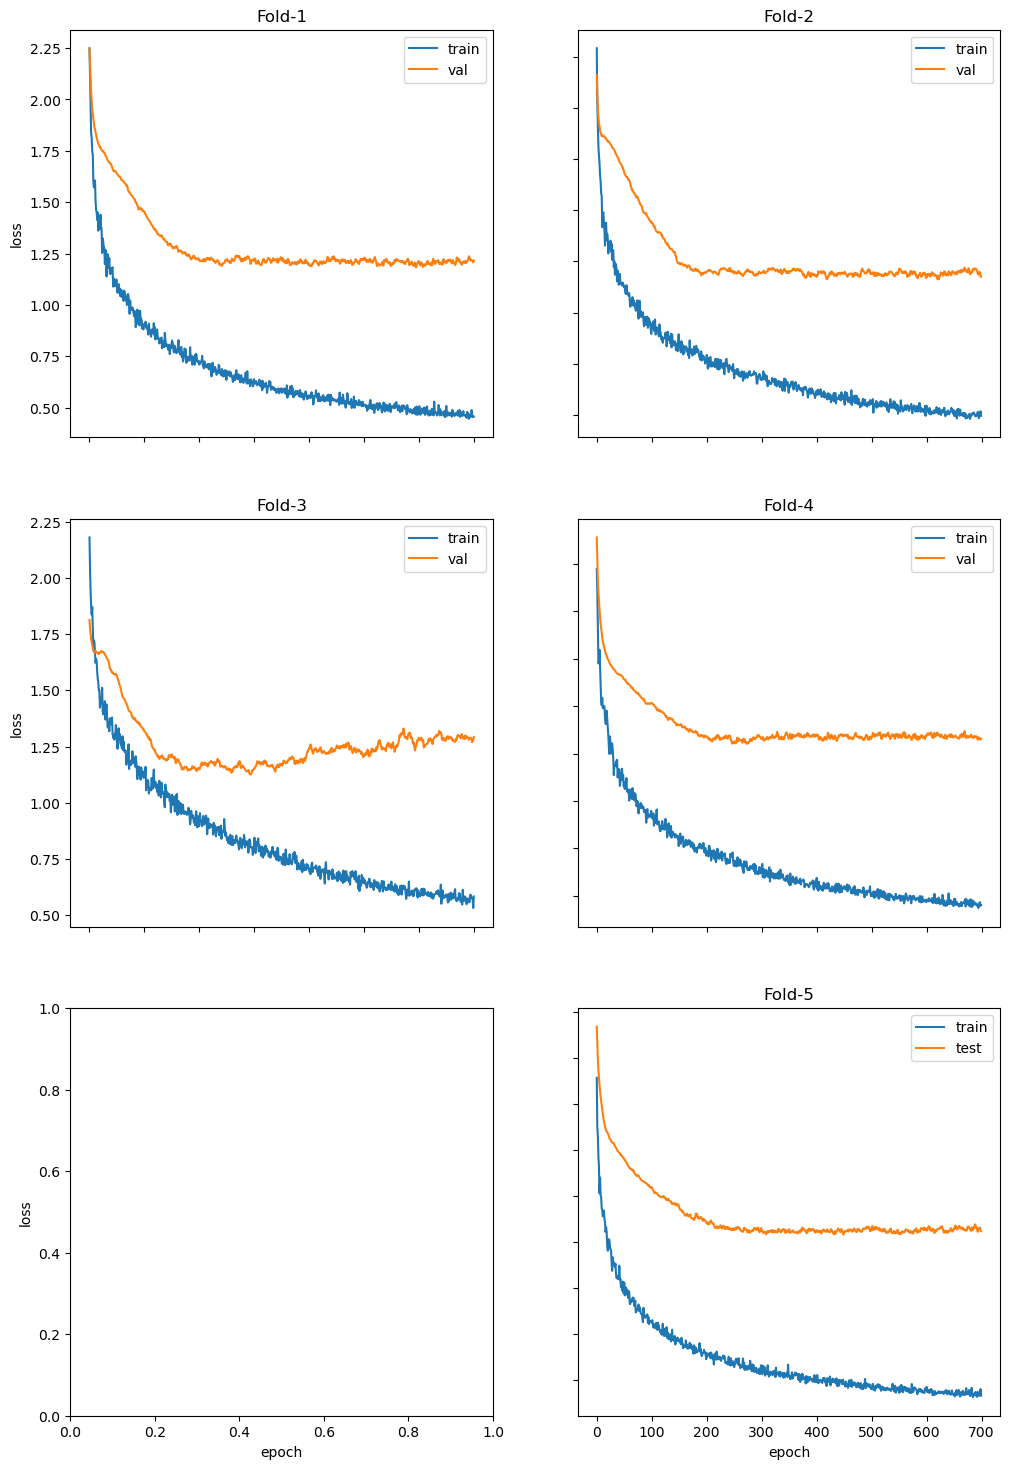

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [47]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_speaker_female'
m='Model_1'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [48]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X1.npy')
yloaded=np.load(savedir+'/y1.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 63.24%


Fold 0: 56.34%

Fold 1: 63.24%

Fold 2: 57.38%

Fold 3: 55.17%

Fold 4: 60.47%

In [49]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

3/3 [==============================] - 0s 17ms/step
(68, 7)
68


array([[8, 0, 0, 2, 4, 2, 0],
       [0, 5, 3, 0, 0, 0, 0],
       [0, 1, 5, 0, 0, 0, 0],
       [0, 0, 0, 7, 1, 0, 0],
       [0, 0, 0, 4, 7, 1, 0],
       [2, 0, 0, 1, 1, 4, 0],
       [0, 2, 1, 0, 0, 0, 7]], dtype=int64)

In [50]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[50.   0.   0.  12.5 25.  12.5  0. ]
 [ 0.  62.5 37.5  0.   0.   0.   0. ]
 [ 0.  16.7 83.3  0.   0.   0.   0. ]
 [ 0.   0.   0.  87.5 12.5  0.   0. ]
 [ 0.   0.   0.  33.3 58.3  8.3  0. ]
 [25.   0.   0.  12.5 12.5 50.   0. ]
 [ 0.  20.  10.   0.   0.   0.  70. ]]


         angry  bored  neutral  disgust  fear  happy   sad
angry     50.0    0.0      0.0     12.5  25.0   12.5   0.0
bored      0.0   62.5     37.5      0.0   0.0    0.0   0.0
neutral    0.0   16.7     83.3      0.0   0.0    0.0   0.0
disgust    0.0    0.0      0.0     87.5  12.5    0.0   0.0
fear       0.0    0.0      0.0     33.3  58.3    8.3   0.0
happy     25.0    0.0      0.0     12.5  12.5   50.0   0.0
sad        0.0   20.0     10.0      0.0   0.0    0.0  70.0



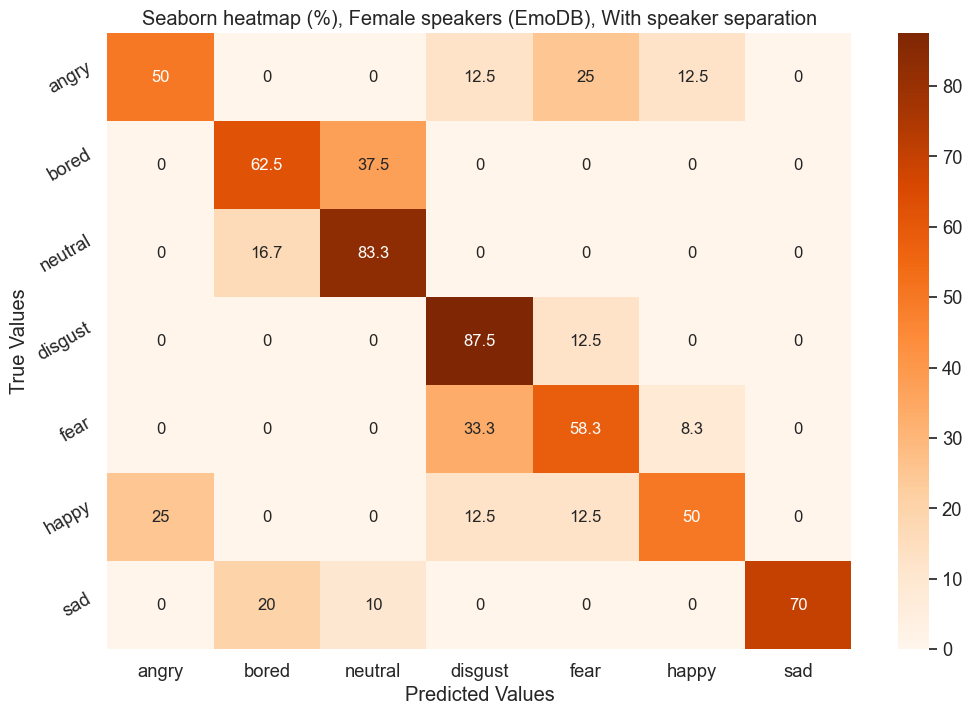

In [51]:
listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Female speakers (EmoDB), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()